In [28]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.signal as sig
from skimage.morphology import reconstruction

%matplotlib inline

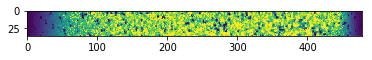

In [3]:
img=io.imread('../../UnitTests/data/spotprojection_0001.tif')
plt.imshow(img,clim=[0,5])

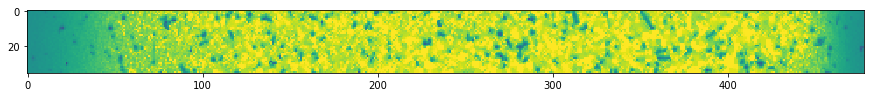

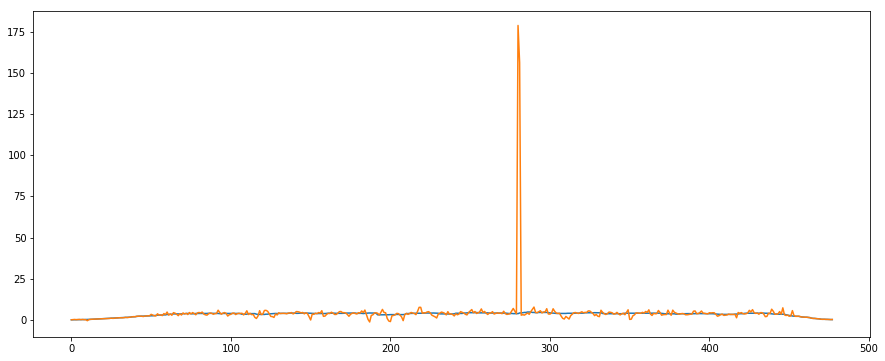

In [24]:
a=img
a[0,:]=sig.medfilt(a[0,:],kernel_size=21)
plt.figure(figsize=(15,3))
plt.imshow(a,clim=[-5,5])

plt.figure(figsize=(15,6))
plt.plot(sig.medfilt(a[1,:],kernel_size=21))
plt.plot(a[1,:])


In [29]:

def fillhole(img) :
    seed = np.copy(img)
    seed[1:-1, 1:-1] = img.max()
    mask = img

    filled = reconstruction(seed, mask, method='erosion')
    
    return filled

def fillpeaks(img) :
    seed = np.copy(img)
    seed[1:-1, 1:-1] = img.min()
    mask = img
    filled = reconstruction(seed, mask, method='dilation')
    
    return filled


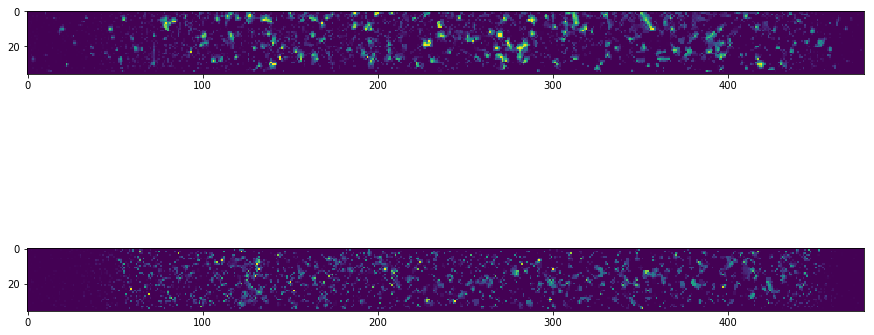

In [36]:
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
plt.imshow(fillhole(img)-img,clim=[0,5])

plt.subplot(2,1,2)
plt.imshow(img-fillpeaks(img),clim=[0,5])

